<a href="https://colab.research.google.com/github/FelipeGBarreto/alura-git/blob/master/An%C3%A1lise_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=8 face="Marker Felt">Análise de Gorjetas de um Restaurante</font>
***

![image.png](attachment:image.png)

## <font color=gray>00. Importando as bibliotecas necessárias<font>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ou warnings.filterwarnings('action=once')

## <font color=gray>01. Verificando o dataset

In [24]:
df = pd.read_csv("tips.csv")
df[:5]

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [26]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [27]:
type(df)

pandas.core.frame.DataFrame

## <font color=gray>02. Alterando os valores para o português

In [28]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [29]:
df.dessert=df.dessert.map({"No":"Não", "Yes":"Sim"})
df.day=df.day.map({"Sun":"Dom", "Sat":"Sab", "Thur":"Qui", "Fri":"Sex"})
df.time=df.time.map({"Dinner":"Jantar", "Lunch":"Almoço"})

In [30]:
df.rename(columns={'total_bill':'valor_conta', 'tip':'gorjeta', 'dessert':'sobremesa', 
                   'day':'dia', 'time':'refeicao', 'size':'total_pessoas'}, inplace=True)
df.columns.name = 'Índice'

## <font color=gray>03. Analisando os dados

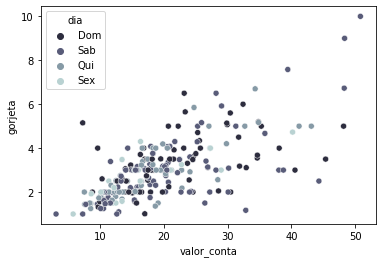

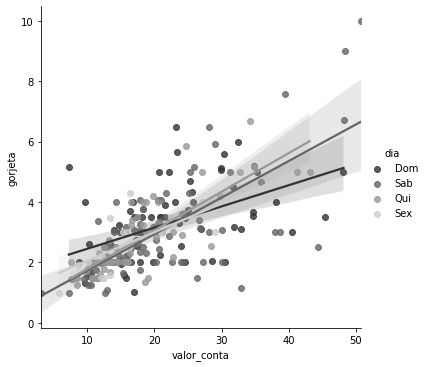

In [31]:
sns.scatterplot(x='valor_conta', y='gorjeta', hue='dia', data=df,
                legend='full', palette='bone')
sns.lmplot(x='valor_conta', y='gorjeta', hue='dia', data=df, palette='gist_gray')

In [32]:
df['porct_gorjeta'] = round(df.gorjeta / df.valor_conta, 3)*100
df[:5]

Índice,valor_conta,gorjeta,sobremesa,dia,refeicao,total_pessoas,porct_gorjeta
0,16.99,1.01,Não,Dom,Jantar,2,5.9
1,10.34,1.66,Não,Dom,Jantar,3,16.1
2,21.01,3.50,Não,Dom,Jantar,3,16.7
3,23.68,3.31,Não,Dom,Jantar,2,14.0
4,24.59,3.61,Não,Dom,Jantar,4,14.7


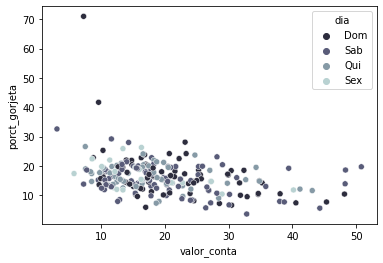

In [33]:
sns.scatterplot(x='valor_conta', y='porct_gorjeta', hue='dia', data=df, palette='bone');

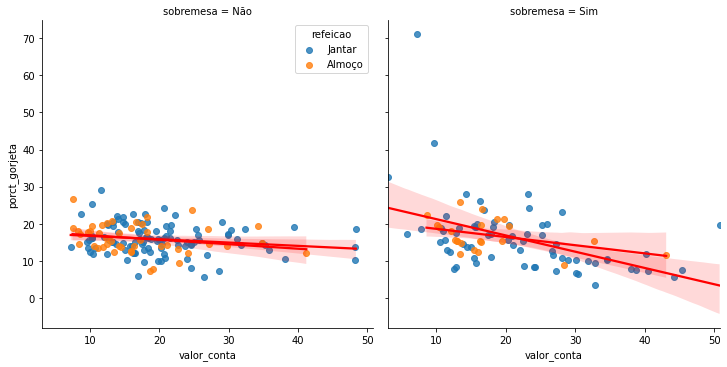

In [34]:
sns.lmplot(x='valor_conta', y='porct_gorjeta', col='sobremesa', data=df, 
           line_kws={'color':'red'}, hue='refeicao', legend_out=False);

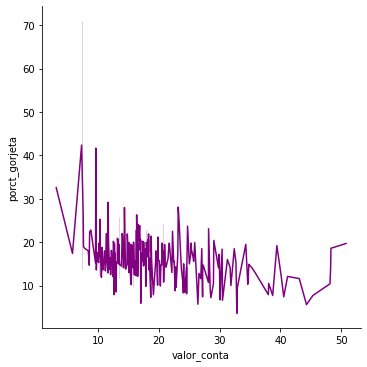

In [35]:
sns.relplot(x='valor_conta', y='porct_gorjeta', kind='line', data=df, color='purple');

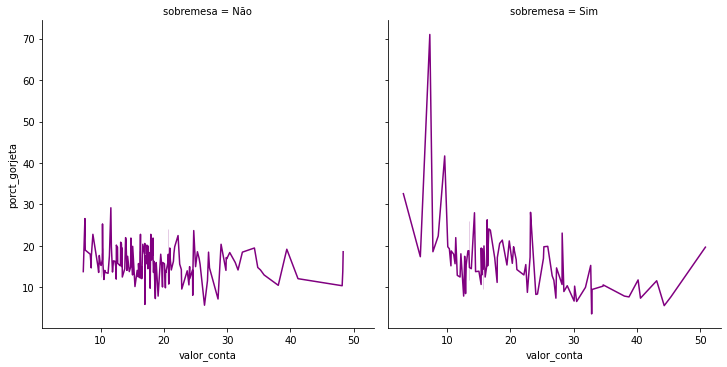

In [36]:
sns.relplot(x='valor_conta', y='porct_gorjeta', kind='line', 
            data=df, color='purple', col='sobremesa');

## <font color=gray>04. Encorpando os gráficos

In [37]:
df.head()

Índice,valor_conta,gorjeta,sobremesa,dia,refeicao,total_pessoas,porct_gorjeta
0,16.99,1.01,Não,Dom,Jantar,2,5.9
1,10.34,1.66,Não,Dom,Jantar,3,16.1
2,21.01,3.50,Não,Dom,Jantar,3,16.7
3,23.68,3.31,Não,Dom,Jantar,2,14.0
4,24.59,3.61,Não,Dom,Jantar,4,14.7


In [38]:
print("Soma total de gorjetas por refeição:")
porct_tip=df.groupby("refeicao")[['gorjeta']].sum()
porct_tip['gorjeta (%)'] = round(100*porct_tip / porct_tip.sum(), 2)
porct_tip

Soma total de gorjetas por refeição:


Índice,gorjeta,gorjeta (%)
refeicao,,
Almoço,185.51,25.36
Jantar,546.07,74.64


In [39]:
print("Quantidade total de gorjetas por refeição:")
round(df.refeicao.value_counts(normalize=True)*100,2)

Quantidade total de gorjetas por refeição:


Jantar    72.13
Almoço    27.87
Name: refeicao, dtype: float64

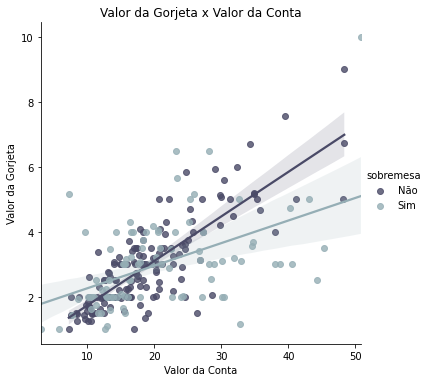

In [40]:
valor_gorjeta = sns.lmplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=df, palette='bone')
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta', 
                  title='Valor da Gorjeta x Valor da Conta');

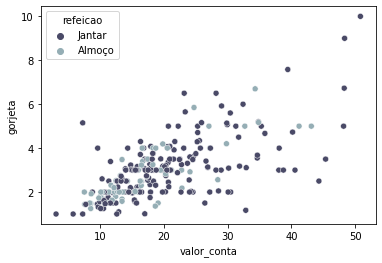

In [41]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', hue='refeicao', palette='bone', 
                                legend='auto', data=df)

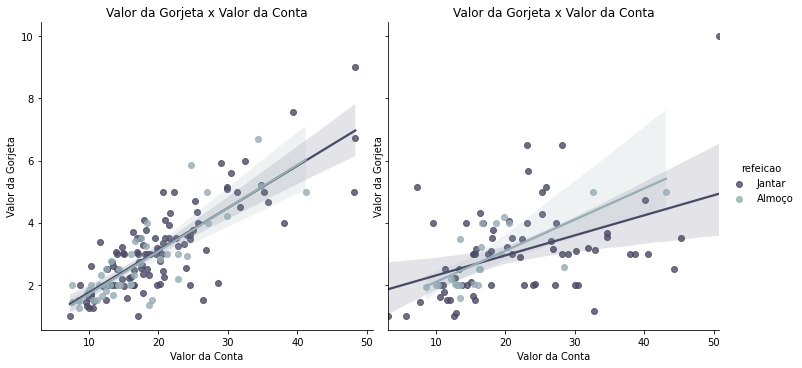

In [42]:
valor_gorjeta = sns.lmplot(x='valor_conta', y='gorjeta', col='sobremesa', hue='refeicao', data=df, palette='bone')
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta', 
                  title='Valor da Gorjeta x Valor da Conta');

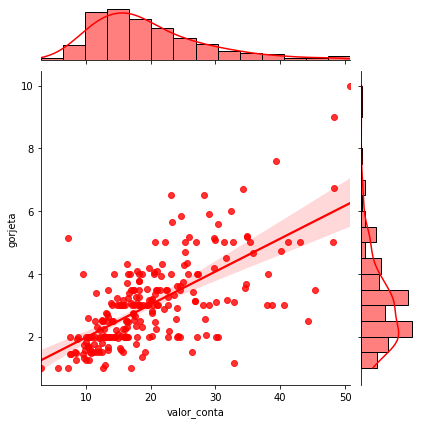

In [43]:
# "kind" must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
valor_gorjata_2 = sns.jointplot(x='valor_conta', y='gorjeta',  kind='reg' ,data=df, color='red')

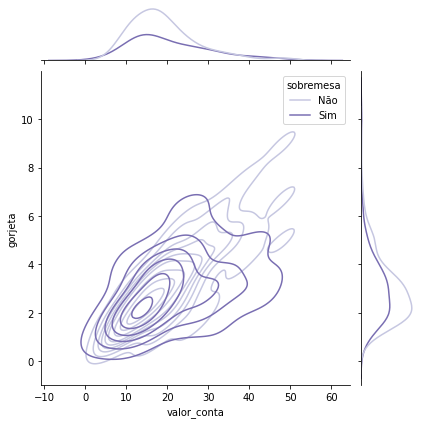

In [44]:
valor_gorjata_2 = sns.jointplot(x='valor_conta', y='gorjeta', hue='sobremesa',  kind='kde', data=df, palette='Purples')

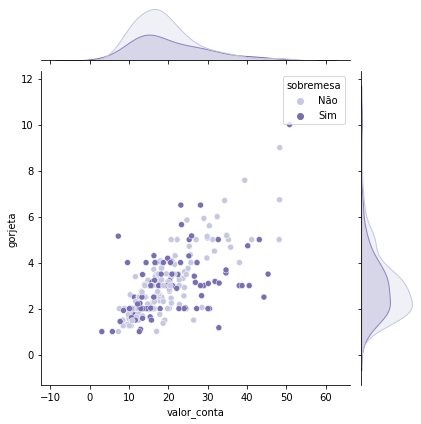

In [45]:
valor_gorjata_2 = sns.jointplot(x='valor_conta', y='gorjeta', hue='sobremesa', 
                                kind='scatter' ,data=df, palette='Purples')

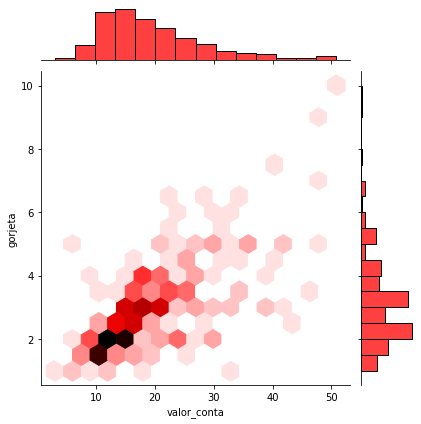

In [46]:
valor_gorjata_2 = sns.jointplot(x='valor_conta', y='gorjeta', kind='hex' ,data=df, color='red')

## <font color=gray>05.Analisando a sobremesa

In [47]:
com_sobremesa=df.query("sobremesa=='Sim'")
com_sobremesa[:5]

Índice,valor_conta,gorjeta,sobremesa,dia,refeicao,total_pessoas,porct_gorjeta
56,38.01,3.00,Sim,Sab,Jantar,4,7.9
58,11.24,1.76,Sim,Sab,Jantar,2,15.7
60,20.29,3.21,Sim,Sab,Jantar,2,15.8
61,13.81,2.00,Sim,Sab,Jantar,2,14.5
62,11.02,1.98,Sim,Sab,Jantar,2,18.0


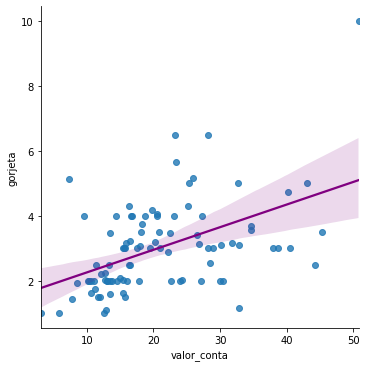

In [48]:
sns.lmplot(x='valor_conta',y='gorjeta',data=com_sobremesa, 
           line_kws={'color':'purple'});

In [49]:
sem_sobremesa = df.query("sobremesa=='Não'")
sem_sobremesa.head()

Índice,valor_conta,gorjeta,sobremesa,dia,refeicao,total_pessoas,porct_gorjeta
0,16.99,1.01,Não,Dom,Jantar,2,5.9
1,10.34,1.66,Não,Dom,Jantar,3,16.1
2,21.01,3.50,Não,Dom,Jantar,3,16.7
3,23.68,3.31,Não,Dom,Jantar,2,14.0
4,24.59,3.61,Não,Dom,Jantar,4,14.7


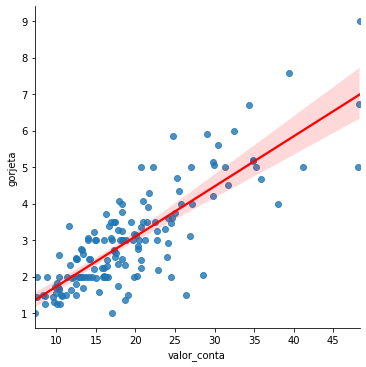

In [50]:
sns.lmplot(x='valor_conta',y='gorjeta',data=sem_sobremesa, 
           line_kws={'color':'red'});

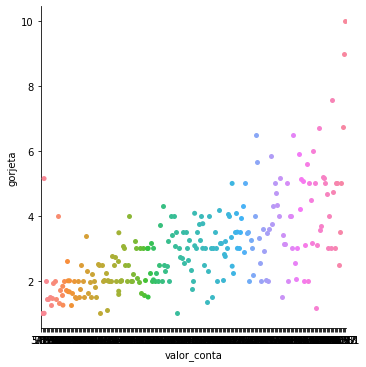

In [51]:
sns.catplot(x='valor_conta',y='gorjeta',data=df)

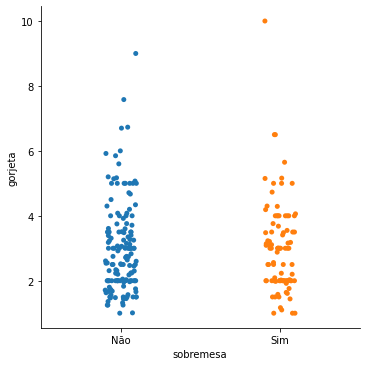

In [52]:
sns.catplot(x='sobremesa',y='gorjeta',data=df);

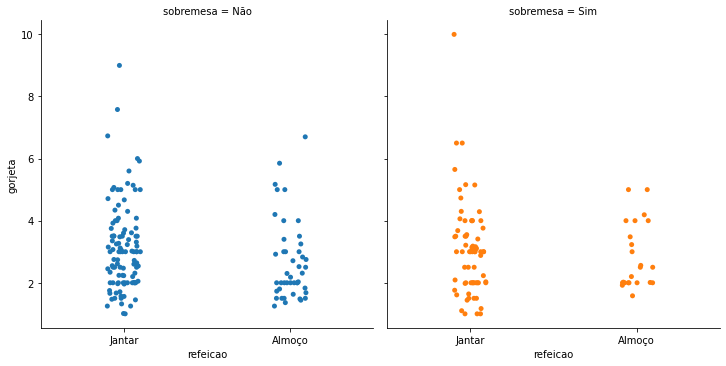

In [53]:
sns.catplot(x='refeicao',y='gorjeta', col='sobremesa', hue='sobremesa',data=df);

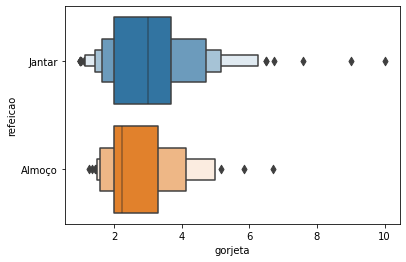

In [54]:
sns.boxenplot(df.gorjeta, df.refeicao);

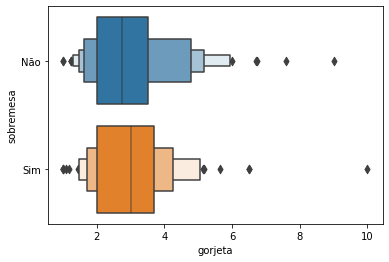

In [55]:
sns.boxenplot(df.gorjeta, df.sobremesa);

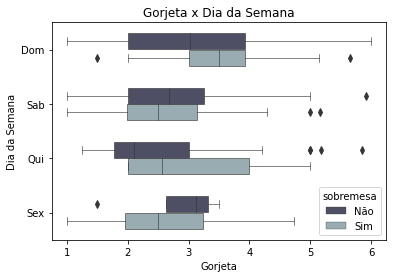

In [56]:
graph = sns.boxplot(df.query("gorjeta<=6").gorjeta, df.dia, df.sobremesa, palette='bone', linewidth=0.6, width=0.6);
graph.set(xlabel='Gorjeta', ylabel='Dia da Semana')
graph.set_title('Gorjeta x Dia da Semana');

## <font color=gray>06.Testes de Hipóteses

<b>H0:</b> Distribuição de Taxa de gorjetas é a mesma nos dois grupos
    
<b>H1:</b> Distribuição de Taxa de gorjetas NÃO é a mesma nos dois grupos

In [57]:
from scipy.stats import ranksums

In [58]:
com_sobremesa[:5]

Índice,valor_conta,gorjeta,sobremesa,dia,refeicao,total_pessoas,porct_gorjeta
56,38.01,3.00,Sim,Sab,Jantar,4,7.9
58,11.24,1.76,Sim,Sab,Jantar,2,15.7
60,20.29,3.21,Sim,Sab,Jantar,2,15.8
61,13.81,2.00,Sim,Sab,Jantar,2,14.5
62,11.02,1.98,Sim,Sab,Jantar,2,18.0


In [59]:
com_sobremesa = com_sobremesa.porct_gorjeta
sem_sobremesa = sem_sobremesa.porct_gorjeta

In [60]:
estatistica_teste, p_valor = ranksums(com_sobremesa, sem_sobremesa)
print(f"O p-valor é: {p_valor.round(3)}")

O p-valor é: 0.568


Como o p-valor >0.05, seguimos com a hipótese nula! Utilizando o teste de Wilcoxon